('panss_n1', [108])
('panss_n3', [584])


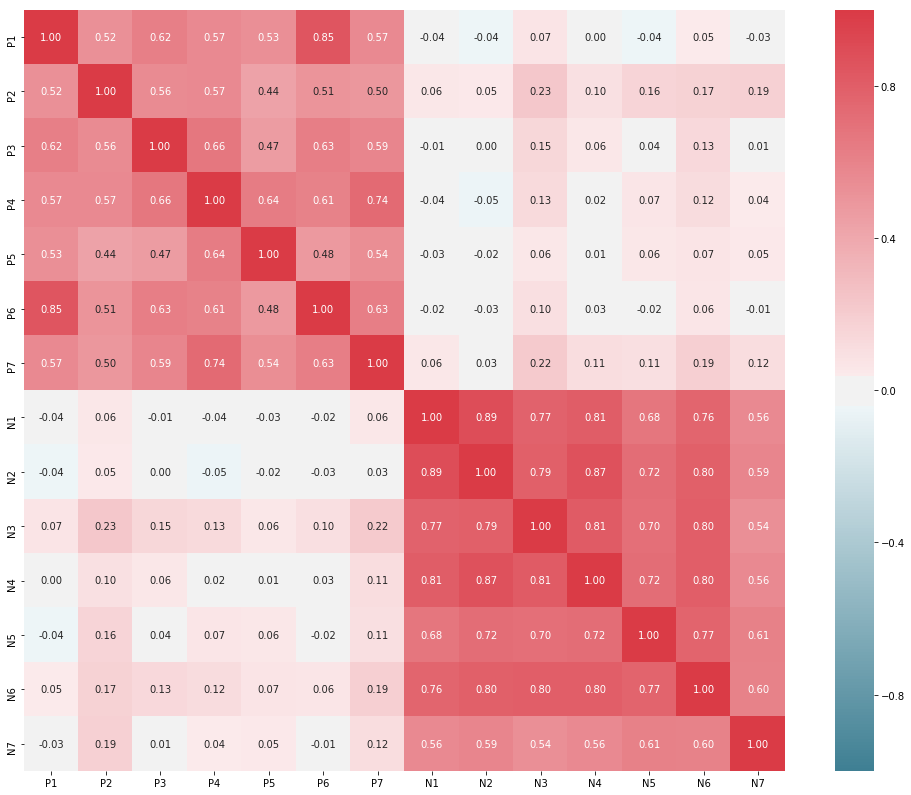

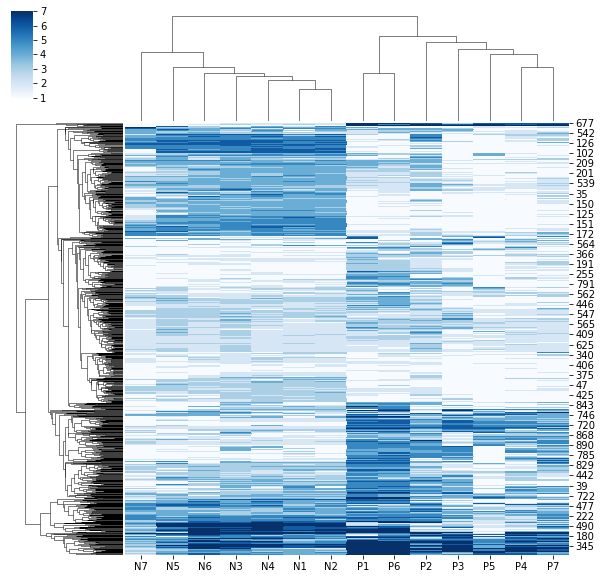

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

panss_p_n = pd.read_csv('panss_p_n.csv')


#数据全部转换为float64
panss_p_n = panss_p_n.astype('float64')

#定位缺失值
for columname in panss_p_n.columns:
    if panss_p_n[columname].count() != len(panss_p_n):
        loc = panss_p_n[columname][panss_p_n[columname].isnull().values==True].index.tolist()
        print(columname, loc)

#以中位数替换缺失值
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy = 'median', axis=0)
imp.fit(panss_p_n)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)
panss_p_n_imputed = imp.transform(panss_p_n)

panss_p_n_imputed = pd.DataFrame(panss_p_n_imputed, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 
                                                            'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7'])

'''
#标准化数据进行后续操作
panss_p_n_imputed_standardized = pd.DataFrame(preprocessing.scale(panss_p_n_imputed), columns=panss_p_n.columns)
'''

#Pearson's correlation coefficient matrix
corr = panss_p_n_imputed.corr()
plt.figure(figsize=(18,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1,  annot=True, square=True, fmt='.2f', cmap = cmap)
plt.savefig('panss_p_n_correlation.png', dpi=300)

#clustermap
sns.clustermap(data=panss_p_n_imputed
               , cmap='Blues', row_cluster=True)
plt.savefig('panss_p_n_cluster.png', dpi=300)
